In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import matplotlib.pyplot as plt
import itertools
from matplotlib import pyplot
import sys
%matplotlib inline

def summarize_diagnostics(history, save_name='temp'):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.tight_layout()
    # save plot to file
    pyplot.savefig(save_name + '_plot.png')
    pyplot.show()
    pyplot.close()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1.keras.backend import clear_session
from tensorflow.compat.v1.keras.backend import get_session
import gc
# import tensorflow

# Reset Keras Session
def reset_keras(model):
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del model # this is from global space - change this as you need
    except:
        pass

    print(gc.collect()) # if it's done something you should see a number being outputted

    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))

# Dataset

In [4]:
DATASET_DIR = 'dataset'
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
TEST_DIR = os.path.join(DATASET_DIR, 'test1')

IMG_WIDTH = 64
IMG_HEIGHT = 64
IMG_SIZE = (IMG_WIDTH, IMG_HEIGHT)
TEST_SIZE = 0.2
EPOCHS = 10
NUM_CATEGORIES = 2


## Load train dataset

In [ ]:
train_images = []
train_labels = []
for image_name in tqdm(os.listdir(TRAIN_DIR)):
    img = cv2.imread(os.path.join(TRAIN_DIR, image_name))
    if img is None:
        print("Fail to load {}".format(image_name))
        continue
    # img = img/255
    try:
        img = cv2.resize(img, dsize=IMG_SIZE)
    except:
        print("Fail to load {}".format(image_name))

    train_images.append(img)
    if 'cat' in image_name:
        train_labels.append(0)
    else:
        train_labels.append(1)

train_labels = tf.keras.utils.to_categorical(train_labels)
# train_images = np.array(train_images)
# train_labels = np.array(train_labels)
np.save('train_images', train_images)
np.save('train_labels', train_labels)

In [10]:
train_images = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [11]:

train_images = train_images / 255
X_train, X_test, y_train, y_test = train_test_split(
    train_images,
    train_labels,
    test_size=TEST_SIZE,
    random_state=63,
    shuffle=True,
)

In [12]:
for i in range(5):
    cv2.imshow('', X_train[i])
    print(y_train[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]


In [13]:
print(X_train[0].shape)
print(X_train[0][:5])
print(y_train[:5])

(64, 64, 3)
[[[0.5372549  0.5372549  0.5372549 ]
  [0.53333333 0.52941176 0.52941176]
  [0.5372549  0.55294118 0.55686275]
  [0.4627451  0.50196078 0.50196078]
  [0.42745098 0.45882353 0.45490196]
  [0.42745098 0.45882353 0.45490196]
  [0.42352941 0.43921569 0.44313725]
  [0.56078431 0.55294118 0.56078431]
  [0.4627451  0.47843137 0.48235294]
  [0.42745098 0.44705882 0.44705882]
  [0.43137255 0.44705882 0.45098039]
  [0.45098039 0.46666667 0.47058824]
  [0.43529412 0.4745098  0.4745098 ]
  [0.43921569 0.43921569 0.44313725]
  [0.46666667 0.48235294 0.47843137]
  [0.4627451  0.48235294 0.47843137]
  [0.46666667 0.48235294 0.48627451]
  [0.44313725 0.45882353 0.4627451 ]
  [0.45490196 0.47058824 0.4745098 ]
  [0.58039216 0.61568627 0.61568627]
  [0.57647059 0.55686275 0.55294118]
  [0.56470588 0.58823529 0.61176471]
  [0.48627451 0.50196078 0.50588235]
  [0.43921569 0.45490196 0.45882353]
  [0.45882353 0.4745098  0.47843137]
  [0.45098039 0.46666667 0.47058824]
  [0.44705882 0.45882353 0

# Model structure

In [14]:
def get_model():
    model = tf.keras.models.Sequential()
        
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    # model.summary()

    return model

In [10]:
# Disable GPU
# tf.config.set_visible_devices([], 'GPU')

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


# Training

## Load pre-trained model or Initialize new model

### Load pretrained-model

In [ ]:
MODEL_PATH = 'CNN_0.81.h5'
model = tf.keras.models.load_model(MODEL_PATH)
# model.compile(
#     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )

### Initialize new model

In [15]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

## Train model

Epoch 1/50
563/563 [==============================] - 13s 15ms/step - loss: 0.6830 - accuracy: 0.5514 - val_loss: 0.6500 - val_accuracy: 0.6210
Epoch 2/50
563/563 [==============================] - 8s 15ms/step - loss: 0.6417 - accuracy: 0.6234 - val_loss: 0.6262 - val_accuracy: 0.6505
Epoch 3/50
563/563 [==============================] - 8s 14ms/step - loss: 0.6201 - accuracy: 0.6535 - val_loss: 0.6069 - val_accuracy: 0.6935
Epoch 4/50
563/563 [==============================] - 8s 14ms/step - loss: 0.5977 - accuracy: 0.6745 - val_loss: 0.5716 - val_accuracy: 0.6990
Epoch 5/50
563/563 [==============================] - 8s 14ms/step - loss: 0.5659 - accuracy: 0.7068 - val_loss: 0.5685 - val_accuracy: 0.6985
Epoch 6/50
563/563 [==============================] - 8s 14ms/step - loss: 0.5328 - accuracy: 0.7307 - val_loss: 0.5810 - val_accuracy: 0.6880
Epoch 7/50
563/563 [==============================] - 8s 15ms/step - loss: 0.5133 - accuracy: 0.7456 - val_loss: 0.6158 - val_accuracy: 0.665

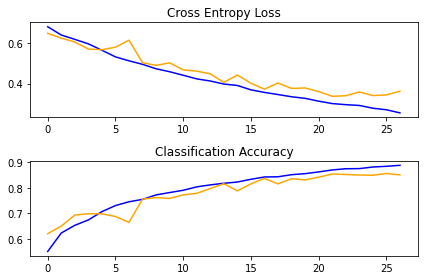

7059


In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, callbacks=[callback])
model.save('temp.h5')
summarize_diagnostics(history, 'temp')
reset_keras(model)

Epoch 1/20
563/563 [==============================] - 9s 14ms/step - loss: 0.2109 - accuracy: 0.9131 - val_loss: 0.3222 - val_accuracy: 0.8690
Epoch 2/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1912 - accuracy: 0.9223 - val_loss: 0.3248 - val_accuracy: 0.8690
Epoch 3/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1887 - accuracy: 0.9246 - val_loss: 0.3212 - val_accuracy: 0.8700
Epoch 4/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1812 - accuracy: 0.9239 - val_loss: 0.3225 - val_accuracy: 0.8705
Epoch 5/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1766 - accuracy: 0.9272 - val_loss: 0.3268 - val_accuracy: 0.8690
Epoch 6/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1729 - accuracy: 0.9307 - val_loss: 0.3285 - val_accuracy: 0.8680
Epoch 7/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1744 - accuracy: 0.9282 - val_loss: 0.3250 - val_accuracy: 0.8750

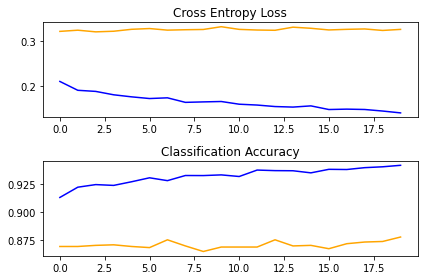

8287


In [19]:
CONTINUE_TRAINING_MODEL = 'temp.h5'
model = tf.keras.models.load_model(CONTINUE_TRAINING_MODEL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20)
model.save('temp2.h5')
summarize_diagnostics(history, 'temp2')
reset_keras(model)

Epoch 1/20
563/563 [==============================] - 9s 15ms/step - loss: 0.1818 - accuracy: 0.9251 - val_loss: 0.3249 - val_accuracy: 0.8660
Epoch 2/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1838 - accuracy: 0.9249 - val_loss: 0.3251 - val_accuracy: 0.8650
Epoch 3/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1843 - accuracy: 0.9238 - val_loss: 0.3238 - val_accuracy: 0.8660
Epoch 4/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1791 - accuracy: 0.9272 - val_loss: 0.3239 - val_accuracy: 0.8670
Epoch 5/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1814 - accuracy: 0.9254 - val_loss: 0.3244 - val_accuracy: 0.8670
Epoch 6/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1774 - accuracy: 0.9297 - val_loss: 0.3233 - val_accuracy: 0.8690
Epoch 7/20
563/563 [==============================] - 8s 14ms/step - loss: 0.1822 - accuracy: 0.9264 - val_loss: 0.3251 - val_accuracy: 0.8675

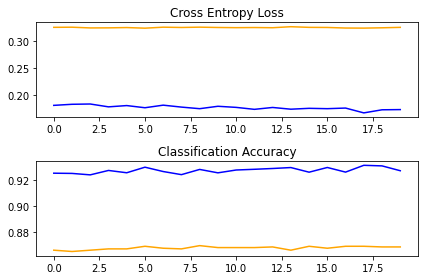

8363


In [18]:
CONTINUE_TRAINING_MODEL = 'temp2.h5'
model = tf.keras.models.load_model(CONTINUE_TRAINING_MODEL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20)
model.save('temp3.h5')
summarize_diagnostics(history, 'temp3')
reset_keras(model)

# Evaluation

In [20]:
model = tf.keras.models.load_model('temp2.h5')

In [21]:
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2480
           1       0.87      0.89      0.88      2520

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



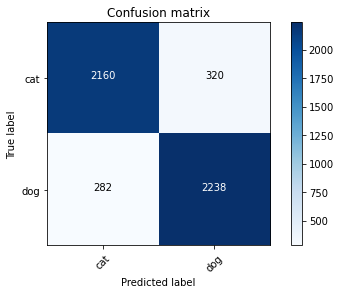

In [22]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes=['cat', 'dog'])

# Demo

In [8]:
demo_img = cv2.imread('demo.jpg')
demo_img = cv2.resize(demo_img, IMG_SIZE)

CONTINUE_TRAINING_MODEL = 'CNN_0.88.h5'
model = tf.keras.models.load_model(CONTINUE_TRAINING_MODEL)

pred = model.predict(np.array([demo_img]))
pred = tf.argmax(pred, axis=1)[0]
print(pred)

tf.Tensor(1, shape=(), dtype=int64)
